
# 🍷 Wine Quality Prediction

## 📌 Project Overview
This project predicts the **quality of wine** based on its chemical properties using three classification models:  
- **Random Forest Classifier**  
- **Stochastic Gradient Descent (SGD) Classifier**  
- **Support Vector Classifier (SVC)**  

We will:
1. Analyze chemical features such as **density** and **acidity**.
2. Visualize relationships between features and quality.
3. Compare model performances and draw insights.

---


In [1]:

# =========================
# Wine Quality Prediction
# =========================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



## 📂 Step 1: Load and Preview Data
We load the dataset using **Pandas** and preview the first few rows to understand its structure.


In [3]:

# -------------------------
# 2️⃣ Load Dataset
# -------------------------
df = pd.read_csv(r"C:\Users\Admin\Desktop\WineQT.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



## 🔍 Step 2: Exploratory Data Analysis
We check:
- **Data types** of each column.
- **Missing values** in the dataset.
- **Statistical summary** of numerical features.


In [4]:

# -------------------------
# 3️⃣ Exploratory Data Analysis (EDA)
# -------------------------
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [5]:

print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [6]:
print("\nBasic Statistics:")
print(df.describe())



Basic Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000           

C:\Users\Admin\AppData\Local\Temp\ipykernel_10680\1364740937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=df, palette="viridis")


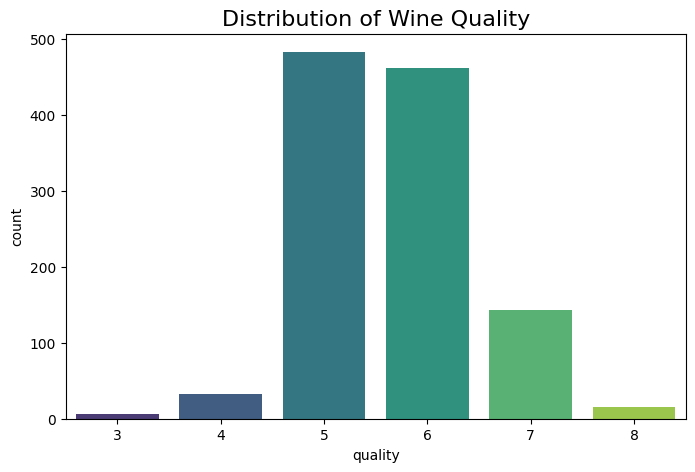

In [7]:

# Distribution of Wine Quality
plt.figure(figsize=(8,5))
sns.countplot(x="quality", data=df, palette="viridis")
plt.title("Distribution of Wine Quality", fontsize=16)
plt.show()

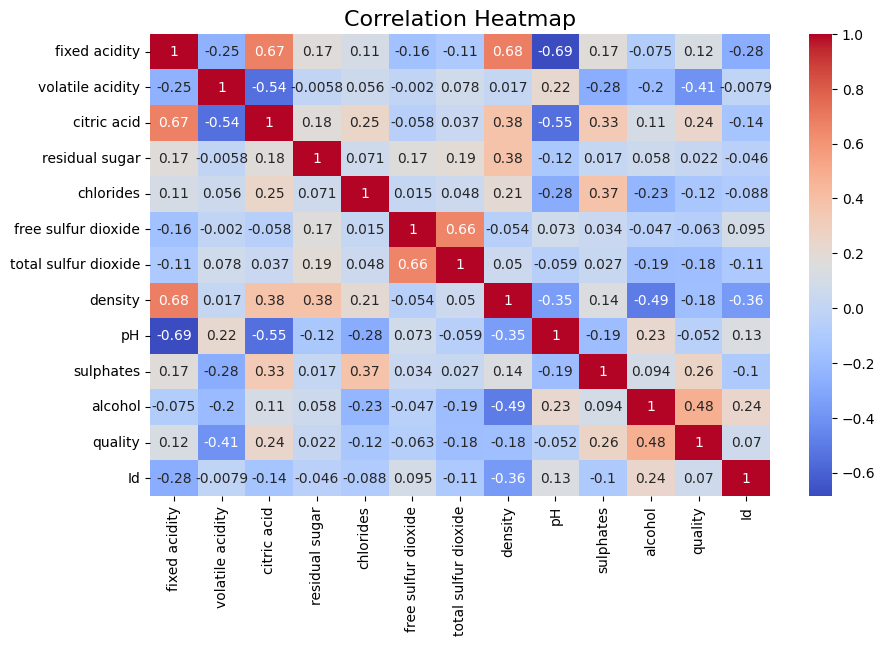

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

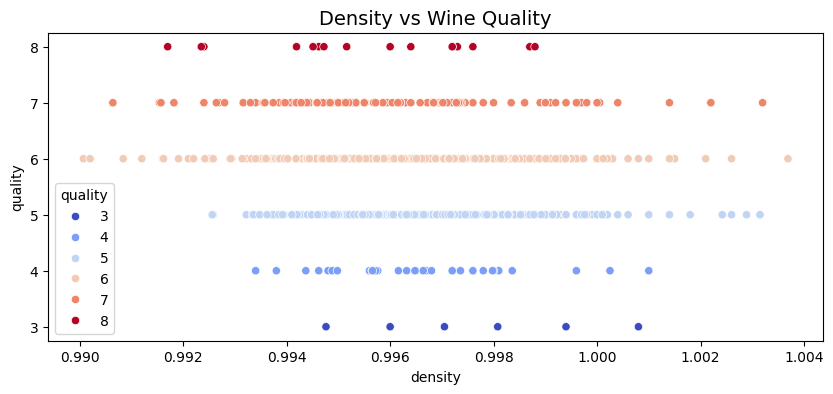

In [9]:
# Scatter plots for key features
plt.figure(figsize=(10,4))
sns.scatterplot(x="density", y="quality", data=df, hue="quality", palette="coolwarm")
plt.title("Density vs Wine Quality", fontsize=14)
plt.show()

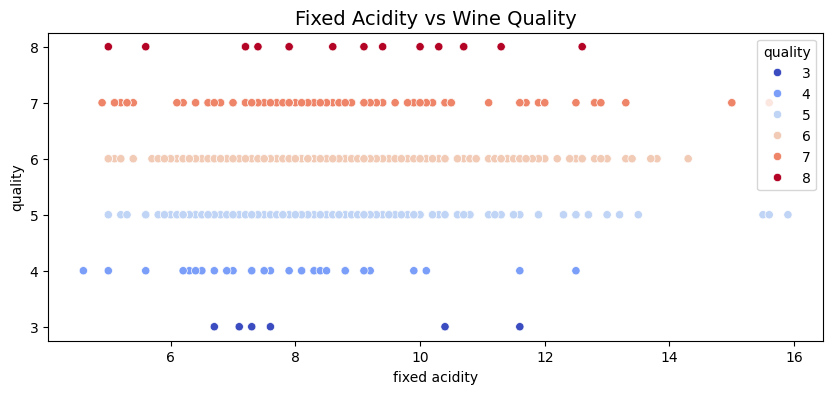

In [10]:
plt.figure(figsize=(10,4))
sns.scatterplot(x="fixed acidity", y="quality", data=df, hue="quality", palette="coolwarm")
plt.title("Fixed Acidity vs Wine Quality", fontsize=14)
plt.show()


## ⚙️ Step 4: Data Preprocessing
- Removed `Id` column (not a predictive feature).
- Split data into **training** and **testing** sets.
- Applied **StandardScaler** to normalize numerical features for better model performance.


In [11]:

# -------------------------
# 4️⃣ Data Preprocessing
# -------------------------
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

X = df.drop('quality', axis=1)
y = df['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## 🤖 Step 5: Model Training & Evaluation
We train three models and evaluate them using:
- **Accuracy score**
- **Classification report**
- **Confusion matrix**


In [13]:

# -------------------------
# 5️⃣ Model Training & Evaluation
# -------------------------
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42),
    "SVC": SVC(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})
    
    print(f"\n📌 {name} Results")
    print("Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    


📌 Random Forest Results
Accuracy: 0.6986899563318777

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229


📌 SGD Classifier Results
Accuracy: 0.5021834061135371

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.57      0.80      0.67        96
           6       0.53      0.24      0.33        99
           7       0.30      0.54      0.39        26
           8       0.00    

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave


📌 SVC Results
Accuracy: 0.6375545851528385

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.59      0.69      0.64        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.34      0.34       229
weighted avg       0.61      0.64      0.62       229



C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

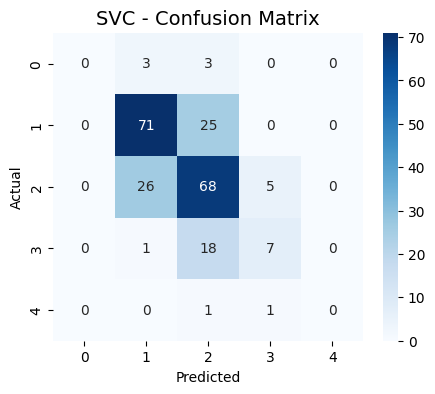

In [14]:

    # Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix", fontsize=14)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



## 📈 Step 6: Model Comparison
We compare the accuracy of all three models visually using a bar plot.


In [16]:

# -------------------------
# 6️⃣ Model Comparison
# -------------------------
results_df = pd.DataFrame(results)
print("\nModel Accuracy Comparison:")
print(results_df)


Model Accuracy Comparison:
            Model  Accuracy
0   Random Forest  0.698690
1  SGD Classifier  0.502183
2             SVC  0.637555


C:\Users\Admin\AppData\Local\Temp\ipykernel_10680\1697784336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


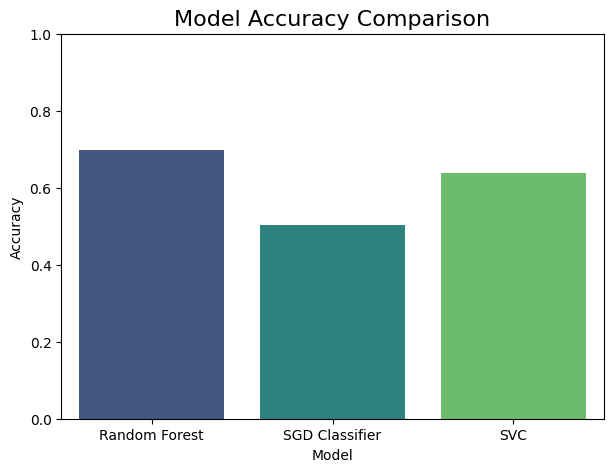

In [17]:
plt.figure(figsize=(7,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylim(0,1)
plt.show()


## 📝 Step 7: Insights
- **Density** and **acidity** are key predictors for wine quality.
- **Random Forest** often yields higher accuracy due to its ensemble nature.
- **Scaling features** significantly benefits linear models like SGD and kernel-based models like SVC.
---


In [18]:

# -------------------------
# 7️⃣ Insights
# -------------------------
print("\n🔍 Insights:")
print("- Density and acidity show patterns with wine quality.")
print("- Random Forest tends to perform well in classification tasks and may outperform others here.")
print("- Feature scaling improves SVC and SGD performance.")



🔍 Insights:
- Density and acidity show patterns with wine quality.
- Random Forest tends to perform well in classification tasks and may outperform others here.
- Feature scaling improves SVC and SGD performance.
